# Исследование предложений рынка недвижимости в 2015-2019 гг


## Загрузка данных

In [1]:
#подключаем библиотеки для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#откроем файл для работы с данными
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Предобработка данных

In [3]:
#изучим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#узнаем долю пропущенных значений в процентном выражении
data.isna().mean()*100.

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [5]:
#узнаем количесвто полных дубликотов
data.duplicated().sum()

0

In [6]:
#получим информацию о распределении значений
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**В результате первичного анализа данных были обнаружены пропуски и аномальные значения:**
- в столбце ceiling_height доля пропущенных значений составляет 39%, что, скорее всего, связано с пропуском поля данных о высоте помещения при заполнении объявления. Доля пропущенных значений значительная, в данном случае заполнение пропусков медианным значением с группировкой по населенному пункту будет наименее искажающим значанием общий вывод, хотя, конечно же, скажется на чистоте результата. Если бы в данных присутствовал год  или тип (сталинка, хрущевка, панельный) постройки, то искажение результатов было бы минимальным. Также присутствуют аномальные значения высоты потолка:1 м, 100 м. На этапе предобработки данных не имеет смысла избавляться от аномальных значений. От них можно будет избавиться после построения диаграммы размаха, не включив данные значения в выборку для анализа.
- в столбце is_apartment наибольшее количество пропусков - 88%, которые могли появиться при пропуске поля при заполнении объявления. Скорее всего, отсутвующие значения в столбце означает, что объект недвижимости не относится к апартаментам. Заполнить пропуски булевым значением False и изменить тип данных столбца на булев тип. 
- в столбцах living_area и kitchen_area пропусков около 8-9%, появлении обусловлено с  пропусками полей данных о площади при заполнении объявления. В данном случае заполнить пропуски предлагается медианным значением с группировкой по количеству комнат. Аномально малые и большие значения также обработать в процессе выборки для анализа.
-  в столбце floors_total доля пропусков менее 1 %, а именно 0,3%, доля незначительная - поэтому можно удалить строки с отсутвующим значением, либо заполнить медианным значением по столбцу. Результат заполнения пропуска не повлияет на общий вывод. 
- в столбце balcony доля пропусков 49%, можно предположить, что поле с данными о кол-ве балконов заполнялось в объявлении только при наличии балконов. Таким образом, пропуски. скорее всего, говорят об отсутствии балконов, необходимо заменить пропуски на 0.
- в столбце locality_name доля пропусков незначительная - 0,2 %, строки с пропущенными значениями в столбце необходимо удалить
- в столбце airports_nearest пропуски составляют 23%. Значения данного столбца не будут использованы для общего вывода исследования, поэтому пропуски можно было бы не запонять, вместе с тем для определения факторов влияющих на стоимость квартиры пропуски можно заполнить медианным значением с группировкой по населенному пункту.
- в столбце cityCenters_nearest также 23% пропусков. Однако данные этого столбца необходимы для построения общих выводов. Заполнить предлагается медианным значением с группировкой по населенному пункту. Также присутвует аномально большое значение удаленности от центра в 66 км, исключить при выборке данных для анализа. 
- в слобце parks_around3000 23 %  - пропуски, из названия стобца следует, что парки должны быть в радиусе 3 км, скорее всего пропуски свидетельствуют об отстутствии парков. Это предположение косвенно подтверждается распределением значений в выборке, но вместе с тем  пропуски предлагается заполнить медианным значением с группировкой по населенным пунктам.
- в столбце parks_nearest 65 % пропусков, что довольно много. Есть предположение, что отстутствие данных в данном столбце связано с отсутствием парков в радиусе 3 км, также косвенно это подверждается максимальным значением удаленности парка в 3 км. Проверить гипотезу можно будет, отфильтровав датасет по отсутствию в радиусе 3км парков и   пропусков в столбце расстояние. Если гипотеза подтвердится, то пропуски можно будет заполнить максимальным значением.  
- в столбцах ponds_around3000 и рonds_nearest похожая закономерность, что и в столбцах с информацией о парках.  
- в столбце days_exposition 13% пропусков, скорее всего, их появление обусловлено тем, что объявление по какой-то причине не было снято с публикации. Заполнить пропуски можно изучив дату размещения объявления, а сроком окончания публикации можно принять дату завершния исследования. Аномально короткие и длинные сроки экспозиции объекта недвижимости можно будет оценить на факт вброса только после построения диаграммы рассеивания. 

In [7]:
#обработаем пропущенные значения в столбце ceiling_height
for row in data['locality_name'].unique():
    median = data.loc[data['locality_name']==row, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name']==row), 'ceiling_height']= median
display(data.head())
print('Пропуски после:', data['ceiling_height'].isna().sum())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски после: 156


In [8]:
#обработаем пропущенные значения в столбце is_apartment
print('Пропусков до:',data['is_apartment'].isna().sum())
data['is_apartment'].value_counts()

Пропусков до: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

In [9]:
#заполним пропуски значением False
data.loc[data['is_apartment'].isna(),'is_apartment'] = False
print('Пропусков после:',data['is_apartment'].isna().sum())
data['is_apartment'].value_counts()

Пропусков после: 0


False    23649
True        50
Name: is_apartment, dtype: int64

In [10]:
#избавимся от строк с пропусками в столбце locality_name 
print('Пропусков до:',data['locality_name'].isna().sum())
data = data.dropna(subset = ['locality_name'])
print('Пропусков после:',data['locality_name'].isna().sum())


Пропусков до: 49
Пропусков после: 0


In [11]:
#заполним пропуски в столбце balcony
print('Пропусков до:',data['balcony'].isna().sum())
data['balcony'] = data['balcony'].fillna(0)
print('Пропусков после:',data['balcony'].isna().sum())

Пропусков до: 11513
Пропусков после: 0


In [12]:
#заполним пропуски в столбце living_area 
print('Пропусков до:',data['living_area'].isna().sum())
for row in data['locality_name'].unique():
    median = data.loc[data['locality_name']==row, 'living_area'].median()
    print(row, median)
    data.loc[(data['living_area'].isna()) & (data['locality_name']==row), 'living_area'] = median
display(data.head(10))
print('Пропусков после:',data['living_area'].isna().sum())

Пропусков до: 1898
Санкт-Петербург 31.3
посёлок Шушары 28.2
городской посёлок Янино-1 27.5
посёлок Парголово 18.0
посёлок Мурино 17.5
Ломоносов 29.0
Сертолово 27.9
Петергоф 28.3
Пушкин 30.0
деревня Кудрово 18.0
Коммунар 28.7
Колпино 29.95
поселок городского типа Красный Бор 45.8
Гатчина 29.0
поселок Мурино 17.0
деревня Фёдоровское 28.85
Выборг 30.0
Кронштадт 28.0
Кировск 29.4
деревня Новое Девяткино 21.5
посёлок Металлострой 27.95
посёлок городского типа Лебяжье 29.3
посёлок городского типа Сиверский 31.07
поселок Молодцово 28.5
поселок городского типа Кузьмоловский 26.8
садовое товарищество Новая Ропша 12.0
Павловск 33.0
деревня Пикколово 27.4
Всеволожск 30.0
Волхов 30.3
Кингисепп 31.0
Приозерск 30.0
Сестрорецк 30.45
деревня Куттузи 15.4
посёлок Аннино 30.0
поселок городского типа Ефимовский 36.5
посёлок Плодовое 25.85
деревня Заклинье 37.3
поселок Торковичи 30.0
поселок Первомайское 29.375
Красное Село 29.0
посёлок Понтонный 27.7
Сясьстрой 31.0
деревня Старая 21.1
деревня Лесколово 3

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


поселок Запорожское 23.3
посёлок городского типа Рощино 27.95
деревня Гостилицы 29.7
деревня Малое Карлино 17.1
посёлок Мичуринское 32.1
посёлок городского типа имени Морозова 33.9
посёлок Песочный 27.75
посёлок Сосново 30.0
деревня Аро 31.5
поселок Ильичёво 23.5
посёлок городского типа Тайцы 28.2
деревня Малое Верево 29.7
деревня Извара 32.0
поселок станции Вещево 24.8
село Паша 34.0
деревня Калитино 29.7
посёлок городского типа Ульяновка 27.6
деревня Чудской Бор 15.1
поселок городского типа Дубровка 27.4
деревня Мины 29.5
поселок Войсковицы 39.8
посёлок городского типа имени Свердлова 20.0
деревня Коркино 19.05
посёлок Ропша 53.0
поселок городского типа Приладожский 27.85
посёлок Щеглово 29.5
посёлок Гаврилово 27.0
Лодейное Поле 32.0
деревня Рабитицы 37.0
поселок городского типа Никольский 24.15
деревня Кузьмолово 33.85
деревня Малые Колпаны 27.0
поселок Тельмана 22.95
посёлок Петро-Славянка nan
городской посёлок Назия 33.4
посёлок Репино 66.8
посёлок Ильичёво 17.55
поселок Углово 48

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


городской посёлок Виллози 41.3
деревня Лампово 32.0
деревня Шпаньково 40.0
деревня Лаврики nan
посёлок Сумино 32.6
посёлок Возрождение 43.2
деревня Старосиверская 29.0
посёлок Кикерино 31.85
поселок Возрождение 52.0
деревня Старое Хинколово 16.8
посёлок Пригородный 23.7
посёлок Торфяное 24.5
городской посёлок Будогощь 20.5
поселок Суходолье 35.0
поселок Красная Долина 28.6
деревня Хапо-Ое 28.0
поселок городского типа Дружная Горка 24.0
поселок Лисий Нос 28.0
деревня Яльгелево 28.9
посёлок Стеклянный 38.0
село Рождествено 29.7
деревня Старополье 30.3
посёлок Левашово nan
деревня Сяськелево 31.0
деревня Камышовка 30.1
садоводческое некоммерческое товарищество Лесная Поляна 44.0
деревня Хязельки nan
поселок Жилгородок 43.7
посёлок городского типа Павлово 48.0
деревня Ялгино 30.0
поселок Новый Учхоз 18.95
городской посёлок Рощино 37.3
поселок Гончарово 28.0
поселок Почап 30.0
посёлок Сапёрное 33.0
посёлок Платформа 69-й километр 29.8
поселок Каложицы 20.0
деревня Фалилеево 22.45
деревня Пе

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


поселок Мичуринское 31.2
деревня Тарасово nan
поселок Кингисеппский 33.0
посёлок при железнодорожной станции Вещево 17.5
поселок Ушаки 23.05
деревня Котлы 29.0
деревня Сижно 31.0
деревня Торосово 28.2
посёлок Форт Красная Горка 21.6
поселок городского типа Токсово 16.0
деревня Новолисино 29.6
посёлок станции Громово 28.1
деревня Глинка 45.35
посёлок Мельниково 30.35
поселок городского типа Назия 24.0
деревня Старая Пустошь 18.6
поселок Коммунары 30.4
поселок Починок 28.1
посёлок городского типа Вознесенье 29.5
деревня Разбегаево 18.3
посёлок городского типа Рябово 18.9
поселок Гладкое 31.0
посёлок при железнодорожной станции Приветнинское 26.9
поселок Тёсово-4 36.0
посёлок Жилгородок 31.05
деревня Бор 147.2
посёлок Коробицыно 31.4
деревня Большая Вруда 31.4
деревня Курковицы 17.0
посёлок Лисий Нос 19.0
городской посёлок Советский 37.25
посёлок Кобралово 31.0
деревня Суоранда 14.5
поселок Кобралово 28.95
поселок городского типа Кондратьево 18.0
коттеджный поселок Счастье 52.0
поселок Лю

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

поселок Пчевжа nan
поселок Володарское 30.6
деревня Нижняя 73.0
коттеджный посёлок Лесное 28.4
деревня Тихковицы 28.0
деревня Борисова Грива 24.0
посёлок Дзержинского 45.5


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,31.30,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,31.30,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Пропусков после: 17


In [13]:
#оставшиеся пропуски заполним медианным по столбцу значением 
data['living_area'] = data['living_area'].fillna (data['living_area'].median())
print('Пропуски после:', data['living_area'].isna().sum())

Пропуски после: 0


In [14]:
#заполним пропуски в столбце kitchen_area 
print('Пропусков до:',data['kitchen_area'].isna().sum())
for row in data['locality_name'].unique():
    median = data.loc[data['locality_name']==row, 'kitchen_area'].median()
    print(row, median)
    data.loc[(data['kitchen_area'].isna()) & (data['locality_name']==row), 'kitchen_area'] = median
display(data.head(10))
print('Пропусков после:',data['kitchen_area'].isna().sum())

Пропусков до: 2269
Санкт-Петербург 9.9
посёлок Шушары 10.8
городской посёлок Янино-1 10.34
посёлок Парголово 11.0
посёлок Мурино 10.385
Ломоносов 6.2
Сертолово 9.3
Петергоф 7.55
Пушкин 8.850000000000001
деревня Кудрово 10.44
Коммунар 8.350000000000001
Колпино 7.9
поселок городского типа Красный Бор 6.2
Гатчина 8.05
поселок Мурино 10.15
деревня Фёдоровское 8.5
Выборг 8.0
Кронштадт 7.55
Кировск 7.5
деревня Новое Девяткино 10.15
посёлок Металлострой 8.2
посёлок городского типа Лебяжье 8.7
посёлок городского типа Сиверский 8.4
поселок Молодцово 6.0
поселок городского типа Кузьмоловский 6.0
садовое товарищество Новая Ропша 13.0
Павловск 7.0
деревня Пикколово 23.6
Всеволожск 10.0
Волхов 6.8
Кингисепп 6.3
Приозерск 6.3
Сестрорецк 10.2
деревня Куттузи 13.85
посёлок Аннино 6.5
поселок городского типа Ефимовский 7.4
посёлок Плодовое 5.7
деревня Заклинье 6.9
поселок Торковичи 8.0
поселок Первомайское 7.8
Красное Село 7.0
посёлок Понтонный 6.0
Сясьстрой 6.0
деревня Старая 10.7
деревня Лесколово 8.

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


посёлок Песочный 4.65
посёлок Сосново 8.0
деревня Аро 12.5
поселок Ильичёво 5.6
посёлок городского типа Тайцы 8.0
деревня Малое Верево 8.2
деревня Извара 5.4
поселок станции Вещево 8.0
село Паша 13.0
деревня Калитино 5.3
посёлок городского типа Ульяновка 6.0
деревня Чудской Бор 7.4
поселок городского типа Дубровка 7.2
деревня Мины 7.25
поселок Войсковицы 7.2
посёлок городского типа имени Свердлова 9.4
деревня Коркино 6.05
посёлок Ропша 8.0
поселок городского типа Приладожский 7.0
посёлок Щеглово 10.15
посёлок Гаврилово 8.0
Лодейное Поле 8.0
деревня Рабитицы 7.15
поселок городского типа Никольский 8.5
деревня Кузьмолово 8.65
деревня Малые Колпаны 10.42
поселок Тельмана 8.7
посёлок Петро-Славянка nan
городской посёлок Назия 5.5
посёлок Репино 18.0
посёлок Ильичёво 7.25
поселок Углово 9.1
поселок Старая Малукса 6.25
садовое товарищество Рахья 5.5
поселок Аннино 8.7
поселок Победа 8.5
деревня Меньково 8.5
деревня Старые Бегуницы 6.0
посёлок Сапёрный 7.5
поселок Семрино 8.5
поселок Гаврилов

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


посёлок Мыза-Ивановка 8.4
село Русско-Высоцкое 10.7
поселок городского типа Лебяжье 8.35
поселок городского типа Форносово 8.0
село Старая Ладога 6.0
поселок Житково 8.9
городской посёлок Виллози 8.2
деревня Лампово 5.8
деревня Шпаньково 11.0
деревня Лаврики nan
посёлок Сумино 8.4
посёлок Возрождение 9.1
деревня Старосиверская 8.5
посёлок Кикерино 8.75
поселок Возрождение 9.0
деревня Старое Хинколово 8.5
посёлок Пригородный 5.5
посёлок Торфяное 8.5
городской посёлок Будогощь 6.9
поселок Суходолье 9.0
поселок Красная Долина 5.5
деревня Хапо-Ое 8.0
поселок городского типа Дружная Горка 6.0
поселок Лисий Нос 5.5
деревня Яльгелево 6.75
посёлок Стеклянный 8.5
село Рождествено 8.15
деревня Старополье 5.5
посёлок Левашово nan
деревня Сяськелево 8.5
деревня Камышовка 7.25
садоводческое некоммерческое товарищество Лесная Поляна 7.0
деревня Хязельки nan
поселок Жилгородок 8.3
посёлок городского типа Павлово 10.35
деревня Ялгино 8.0
поселок Новый Учхоз 6.1
городской посёлок Рощино 8.1
поселок Гон

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


посёлок Алексеевка 6.2
поселок Серебрянский 5.5
поселок Лукаши 6.0
поселок Петровское 9.05
деревня Щеглово 9.4
поселок Мичуринское 5.3
деревня Тарасово nan
поселок Кингисеппский 7.25
посёлок при железнодорожной станции Вещево 6.0
поселок Ушаки 6.9
деревня Котлы 6.0
деревня Сижно 11.0
деревня Торосово 8.3
посёлок Форт Красная Горка 4.8
поселок городского типа Токсово 10.2
деревня Новолисино 8.1
посёлок станции Громово 8.5
деревня Глинка 17.25
посёлок Мельниково 6.0
поселок городского типа Назия 7.1
деревня Старая Пустошь 6.3
поселок Коммунары 8.5
поселок Починок 5.7
посёлок городского типа Вознесенье 6.0
деревня Разбегаево 9.0
посёлок городского типа Рябово 10.0
поселок Гладкое 9.0
посёлок при железнодорожной станции Приветнинское 8.3
поселок Тёсово-4 9.0
посёлок Жилгородок 8.25
деревня Бор 17.8
посёлок Коробицыно 5.1
деревня Большая Вруда 5.4
деревня Курковицы 8.4
посёлок Лисий Нос 9.2
городской посёлок Советский 5.300000000000001
посёлок Кобралово 8.2
деревня Суоранда 6.4
поселок Кобр

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


поселок Лесное 8.8
поселок Совхозный 9.0
поселок Усть-Луга 9.0
посёлок Ленинское 7.0
посёлок Суйда 7.0
посёлок городского типа Форносово 8.5
деревня Нижние Осельки 10.0
посёлок станции Свирь 8.0
поселок Перово 9.0
Высоцк 5.6
поселок Гарболово 6.7
село Шум 6.5
поселок Котельский 7.0
поселок станции Лужайка nan
деревня Большая Пустомержа 8.0
поселок Красносельское nan
деревня Вахнова Кара nan
деревня Пижма 9.0
коттеджный поселок Кивеннапа Север 18.0
поселок Коробицыно 9.0
поселок Ромашки 8.0
посёлок Перово 9.0
деревня Каськово 22.0
деревня Куровицы 8.5
посёлок Плоское nan
поселок Сумино 8.3
поселок городского типа Большая Ижора 8.5
поселок Кирпичное 5.3
деревня Ям-Тесово 8.5
деревня Раздолье nan
деревня Терпилицы 5.5
посёлок Шугозеро 9.0
деревня Ваганово 8.5
поселок Пушное 8.0
садовое товарищество Садко 8.7
посёлок Усть-Ижора 7.9
деревня Выскатка 8.7
городской посёлок Свирьстрой nan
поселок Громово 7.0
деревня Кисельня 9.0
посёлок Старая Малукса 10.9
деревня Трубников Бор nan
поселок Кал

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

поселок Рабитицы 6.0
деревня Большой Сабск 8.4
деревня Русско nan
деревня Лупполово 9.6
деревня Большое Рейзино 10.0
деревня Малая Романовка 9.0
поселок Дружноселье 6.2
поселок Пчевжа nan
поселок Володарское 6.3
деревня Нижняя 9.0
коттеджный посёлок Лесное 8.8
деревня Тихковицы 9.0
деревня Борисова Грива 5.5
посёлок Дзержинского 5.5


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,31.30,9,False,...,9.90,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,31.30,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Пропусков после: 19


In [15]:
#оставшиеся пропуски заполним медианным по столбцу значением 
data['kitchen_area'] = data['kitchen_area'].fillna (data['kitchen_area'].median())
print('Пропуски после:', data['kitchen_area'].isna().sum())

Пропуски после: 0


In [16]:
#заполним пропуски в столбце floors_total медианным по столбцу значением
print('Пропуски до:', data['floors_total'].isna().sum())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
print('Пропуски после:', data['floors_total'].isna().sum())

Пропуски до: 85
Пропуски после: 0


In [17]:
#заполним пропуски в столбце airports_nearest 
print('Пропусков до:',data['airports_nearest'].isna().sum())
data.groupby('locality_name').agg({'airports_nearest': 'median'}).head(20)


Пропусков до: 5534


,airports_nearest
locality_name,
Бокситогорск,NaN
Волосово,NaN
Волхов,NaN
Всеволожск,NaN
Выборг,NaN
Высоцк,NaN
Гатчина,NaN
Зеленогорск,72282.0
Ивангород,NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23529 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [19]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
print('Пропуски после:', data['airports_nearest'].isna().sum())

Пропуски после: 0


In [20]:
#заполним пропуски в столбце cityCenters_nearest 
data.groupby('locality_name').agg({'cityCenters_nearest': 'median'}).head(20)

,cityCenters_nearest
locality_name,
Бокситогорск,NaN
Волосово,NaN
Волхов,NaN
Всеволожск,NaN
Выборг,NaN
Высоцк,NaN
Гатчина,NaN
Зеленогорск,53381.0
Ивангород,NaN


**В результае анализа медианных значений по населенным пунктам было выявлено, что расстояние до центра в пригородах Санкт-Петербурга было указано до центра не населенных пунктов,а до центра  Санкт-Петербурга. Этим обусловлено и наличие аномально больших значений в столбце. Для некоторых населенных пунктов невозможно вычислить медианное значение с группировкой по населенному пункту, а заполнять медианным значением по столбцу пропуски не имеет смысла, так как это будет серьезное искажение данных, которое может повлиять на общий вывод исследования. Предлагается на этапе оценки влияния на стоимость объекта недвижимости фактора удаленности от центра города сделать срез, в который попали бы только те населенные пункты, у которых есть данные. Удалять либо заполнять пропуски на данном этапе нецелесообразно.**

In [21]:
# обработаем пропуски в слобце parks_around3000
data.groupby('locality_name').agg({'parks_around3000': 'median'}).head(10)

,parks_around3000
locality_name,
Бокситогорск,NaN
Волосово,NaN
Волхов,NaN
Всеволожск,NaN
Выборг,NaN
Высоцк,NaN
Гатчина,NaN
Зеленогорск,3.0
Ивангород,NaN


**В результае анализа медианных значений по населенным пунктам было выявлено, что определить медианное значение количества парков в радиусе 3 км для многих населенных пунктов невозможно, в связи с этим предлагается заполнить все пропуски 0, так как, скорее всего, отсутствие данных говорит об отсутствии парков. Тем более медианное значение столбца = 0.**

In [22]:
print('Пропуски до:', data['parks_around3000'].isna().sum())
data['parks_around3000'] = data['parks_around3000'].fillna(0)
print('Пропуски после:', data['parks_around3000'].isna().sum())

Пропуски до: 5510
Пропуски после: 0


In [23]:
# обработаем пропуски в слобце parks_nearest, проверим совпадает отсутствие парков в радиусе 3 км с отсутствием данных в столбце
print('Пропуски до:', data['parks_nearest'].isna().sum())
data.query('parks_around3000 < 1 and parks_nearest.isna()')

Пропуски до: 15586


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,26756.5,NaN,0.0,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,31.30,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,26756.5,NaN,0.0,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.30,7,False,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,...,6.00,0.0,Тихвин,26756.5,NaN,0.0,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.50,0.0,Тосно,26756.5,NaN,0.0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,8.15,0.0,село Рождествено,26756.5,NaN,0.0,NaN,NaN,NaN,NaN


In [24]:
# заполним пропуски в столбце parks_nearest максимальным значением столбца 
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].max()
print('Пропуски после:', data['parks_nearest'].isna().sum())
data.head(10)

Пропуски после: 0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,3190.0,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,31.30,9,False,...,9.90,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,26756.5,NaN,0.0,3190.0,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,3190.0,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,31.30,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,3190.0,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,26756.5,NaN,0.0,3190.0,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,3190.0,0.0,NaN,289.0


In [25]:
# заполним пропуски в столбцах ponds_around3000 и рonds_nearest 
print('Пропуски до в ponds_around3000:', data['ponds_around3000'].isna().sum())
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0
print('Пропуски после в ponds_around3000:', data['ponds_around3000'].isna().sum())

Пропуски до в ponds_around3000: 5510
Пропуски после в ponds_around3000: 0


In [26]:
data['ponds_nearest'].head()

0    755.0
1      NaN
2    574.0
3    234.0
4     48.0
Name: ponds_nearest, dtype: float64

In [27]:
print('Пропуски до в рonds_nearest :', data['ponds_nearest'].isna().sum())
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].max())
print('Пропуски после в рonds_nearest :', data['ponds_nearest'].isna().sum())

Пропуски до в рonds_nearest : 14565
Пропуски после в рonds_nearest : 0


In [28]:
#изменим тип данных в столбце first_day_exposition, тк будет необходимо в дальнейшем работать с этим столбцом
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data.info()
data.sort_values(by = 'first_day_exposition')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23529 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
696,1,3364930.0,34.69,2014-11-27,1,2.64,25.0,23.43,25,False,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,3190.0,0.0,1344.0,574.0
13246,1,14000000.0,142.00,2014-11-27,3,2.77,5.0,95.70,4,False,...,14.30,1.0,Санкт-Петербург,38184.0,11755.0,1.0,19.0,1.0,77.0,1341.0
3291,8,8200000.0,52.50,2014-11-27,1,2.70,8.0,21.50,2,False,...,15.10,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,1344.0,NaN
10132,2,16137000.0,154.76,2014-11-27,4,2.70,20.0,67.81,20,False,...,32.55,0.0,Санкт-Петербург,18490.0,17492.0,0.0,3190.0,2.0,113.0,573.0
15427,2,3550000.0,34.00,2014-11-27,1,2.55,9.0,18.90,7,False,...,6.00,1.0,Санкт-Петербург,13430.0,14405.0,1.0,500.0,1.0,504.0,1149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,7,9000000.0,60.30,2019-05-03,2,3.25,5.0,36.90,4,False,...,5.80,4.0,Санкт-Петербург,32302.0,4662.0,1.0,398.0,0.0,1344.0,NaN
15881,9,2100000.0,35.80,2019-05-03,1,2.50,5.0,18.00,5,False,...,7.00,1.0,посёлок Ленинское,26756.5,NaN,0.0,3190.0,0.0,1344.0,NaN
9217,7,4300000.0,35.70,2019-05-03,1,2.70,21.0,15.00,12,False,...,13.00,2.0,Мурино,26756.5,NaN,0.0,3190.0,0.0,1344.0,NaN
2178,10,5100000.0,51.00,2019-05-03,1,2.73,9.0,15.00,2,False,...,25.00,0.0,Кудрово,26756.5,NaN,0.0,3190.0,0.0,1344.0,NaN


In [29]:
#изменим типы данных в столбцах floors_total,balcony, parks_around3000, ponds_around3000   на целочисленный

data = data.astype({'floors_total': int, 'balcony': int, 'parks_around3000': int, 'ponds_around3000': int})
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Выводы по предобработке данных
В результате предобработки данных были решены следующие задачи:
- обработаны пропуски в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest , parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. 
- в столбцах  cityCenters_nearest, days_exposition в процессе предобработки данных было принято решение в целях избежания искажения итоговых результатов исследования не обрабатывать пропуски. Так в частноти в столбце days_exposition отсутвующие значения, скорее всего, связаны с тем, что объявление не было снято с публикации. 
- изменен тип данных в столбцах для последующей обрабоки значений : floors_total,balcony, parks_around3000, ponds_around3000 на целочисленный, is_apartment на булев тип, first_day_exposition на данные представляющие время. 

## Дополнительные расчеты 

In [30]:
# добавим новый столбец в датасет с значением квадратного метра и посмотрим среднюю стоимость за квадратный метр в населенных пунктах 
data['price_per_area'] = data['last_price']/data['total_area']
(
    data
    .pivot_table(index='locality_name', values = 'price_per_area')
    .sort_values(by='price_per_area', ascending = False)
) 

,price_per_area
locality_name,
посёлок Лисий Нос,121616.221359
Зеленогорск,115122.799198
Санкт-Петербург,114849.008794
посёлок Репино,104238.614786
Пушкин,103125.819291
...,...
поселок Совхозный,12629.129129
деревня Выскатка,12335.480902
деревня Вахнова Кара,11688.311688


In [31]:
#добавим в датасет столбцы с днем, месяцем и годом публикации объявления
data['first_exposition_day_of_week'] = data['first_day_exposition'].dt.day_name()
data['first_exposition_month'] = data['first_day_exposition'].dt.month_name()
data['first_exposition_month_index'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['first_exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data[['first_day_exposition', 'first_exposition_day_of_week', 'first_exposition_month', 'first_exposition_year']]

,first_day_exposition,first_exposition_day_of_week,first_exposition_month,first_exposition_year
0,2019-03-07,Thursday,March,2019
1,2018-12-04,Tuesday,December,2018
2,2015-08-20,Thursday,August,2015
3,2015-07-24,Friday,July,2015
4,2018-06-19,Tuesday,June,2018
...,...,...,...,...
23694,2017-03-21,Tuesday,March,2017
23695,2018-01-15,Monday,January,2018
23696,2018-02-11,Sunday,February,2018
23697,2017-03-28,Tuesday,March,2017


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  23650 non-null  int64         
 1   last_price                    23650 non-null  float64       
 2   total_area                    23650 non-null  float64       
 3   first_day_exposition          23650 non-null  datetime64[ns]
 4   rooms                         23650 non-null  int64         
 5   ceiling_height                23529 non-null  float64       
 6   floors_total                  23650 non-null  int64         
 7   living_area                   23650 non-null  float64       
 8   floor                         23650 non-null  int64         
 9   is_apartment                  23650 non-null  object        
 10  studio                        23650 non-null  bool          
 11  open_plan                   

In [33]:
#добавим категорию этажности объекта недвижимости
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
#применим функцию к датасету и создадим новый столбец со значениями категории этажности квартиры
data['floor_category'] = data.apply(floor_category, axis = 1)
data[['locality_name','floor','floor_category']]

,locality_name,floor,floor_category
0,Санкт-Петербург,8,другой
1,посёлок Шушары,1,первый
2,Санкт-Петербург,4,другой
3,Санкт-Петербург,9,другой
4,Санкт-Петербург,13,другой
...,...,...,...
23694,Санкт-Петербург,3,другой
23695,Тосно,4,другой
23696,село Рождествено,1,первый
23697,Санкт-Петербург,12,другой


In [34]:
#добавим в датасет новый столбец отражающий соотношение жилой и общей площади
data['living_area_ratio'] = data['living_area']/data['total_area']
data[['locality_name', 'total_area', 'living_area', 'living_area_ratio']]

,locality_name,total_area,living_area,living_area_ratio
0,Санкт-Петербург,108.00,51.0,0.472222
1,посёлок Шушары,40.40,18.6,0.460396
2,Санкт-Петербург,56.00,34.3,0.612500
3,Санкт-Петербург,159.00,31.3,0.196855
4,Санкт-Петербург,100.00,32.0,0.320000
...,...,...,...,...
23694,Санкт-Петербург,133.81,73.3,0.547792
23695,Тосно,59.00,38.0,0.644068
23696,село Рождествено,56.70,29.7,0.523810
23697,Санкт-Петербург,76.75,31.3,0.407818


In [35]:
#добавим в датасет новый столбец отражающий соотношение площади кухни и общей
data['kitchen_area_ratio'] = data['kitchen_area']/data['total_area']
data[['locality_name', 'total_area', 'kitchen_area', 'kitchen_area_ratio']]

,locality_name,total_area,kitchen_area,kitchen_area_ratio
0,Санкт-Петербург,108.00,25.00,0.231481
1,посёлок Шушары,40.40,11.00,0.272277
2,Санкт-Петербург,56.00,8.30,0.148214
3,Санкт-Петербург,159.00,9.90,0.062264
4,Санкт-Петербург,100.00,41.00,0.410000
...,...,...,...,...
23694,Санкт-Петербург,133.81,13.83,0.103356
23695,Тосно,59.00,8.50,0.144068
23696,село Рождествено,56.70,8.15,0.143739
23697,Санкт-Петербург,76.75,23.30,0.303583


## Исследовательский анализ данных

- В целях исключения выбросов и редких значений построим гистограммы и диаграммы размаха

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

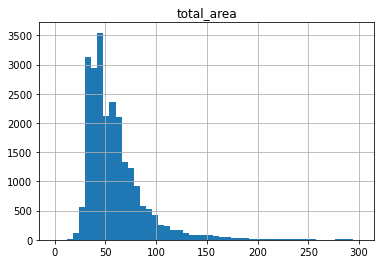

In [36]:
#построим гистограмму для площади 
data.hist('total_area', bins=50, range=(0,300))
data['total_area'].describe()

<AxesSubplot:>

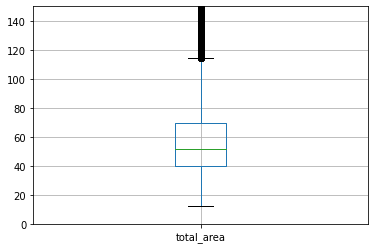

In [37]:
plt.ylim(0,150)
data.boxplot('total_area')

**Гистограмма отражает распределение данных по площади объектов недвижимости. В основном в таблице квартиры площадью от 40 кв м до 70 кв м,  квартиры с площадью больше 115 кв м похожи на выбросы.**

count    2.365000e+04
mean     9.943225e+04
std      5.033794e+04
min      1.118349e+02
25%      7.661497e+04
50%      9.500000e+04
75%      1.142742e+05
max      1.907500e+06
Name: price_per_area, dtype: float64

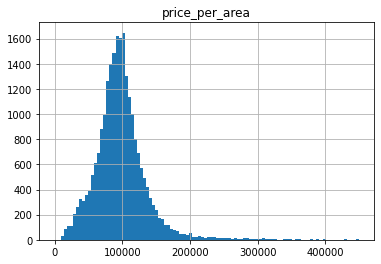

In [38]:
#построим гистограмму для цены за кв м
data.hist('price_per_area', bins=100, range=(0,450000))
data['price_per_area'].describe()

<AxesSubplot:>

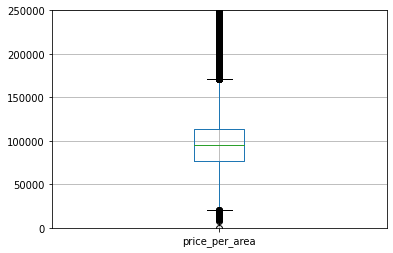

In [39]:
plt.ylim(0,250000)
data.boxplot('price_per_area')

**В результате анализа графиков:**
- в среднем на рынке стоимость квадратного метра равна чуть меньше 100 тыс
- присутствуют редкие значения (от 350 тыс и свыше)
- выбросы меньше 25 тыс за кв м и свыше 175 кв м 

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

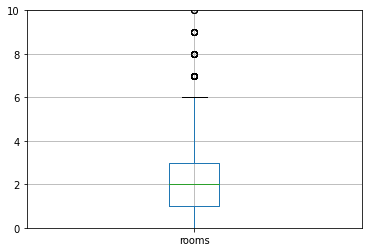

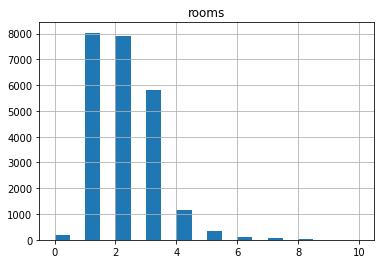

In [40]:
#построим гистограмму для числа комнат 
plt.ylim(0, 10)
data.boxplot('rooms')
data.hist('rooms', bins=20, range=(0,10))
data['rooms'].describe()

**В основном на рынке недвижимости представлены 1,2,3 комнатные квартиры. Настораживают значения 0, и больше 5.**

count    23529.000000
mean         2.733949
std          1.012964
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

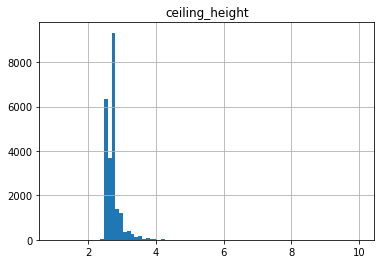

In [41]:
#построим гистограмму для высоты потолков 
data.hist('ceiling_height', bins=80, range = (1,10))
data['ceiling_height'].describe()

<AxesSubplot:>

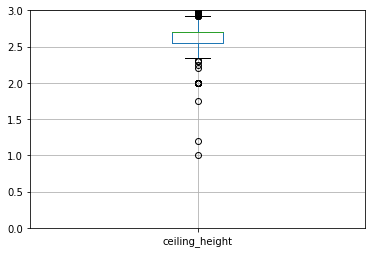

In [42]:
plt.ylim(0, 3)
data.boxplot('ceiling_height')

**Наиболее чаще встречаются объекты недвижимости с высотой потолков в 2,5 и 2,7 м**

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

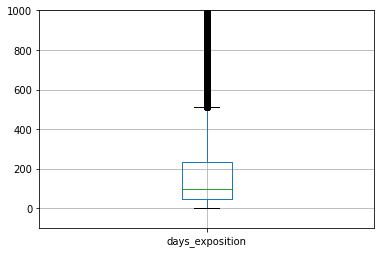

In [43]:
#изучим время продажи квартир
plt.ylim(-100, 1000)
data.boxplot('days_exposition')
data['days_exposition'].describe()

In [44]:
#оценим средний срок экспозиции
good_time = data.query('20<days_exposition<400 and 1<=rooms<6')
good_time.pivot_table(index = 'rooms', values = 'days_exposition', aggfunc = ['mean','median'])

,mean,median
,days_exposition,days_exposition
rooms,,
1,119.758659,86.0
2,124.638862,92.0
3,137.220881,105.0
4,153.597615,124.0
5,164.830508,125.0


**Опираясь на медианные значения, можно сделать вывод, что средний срок экспозиции на рынке 1к квартиры  составляет чуть меньше 3 месяцев, 2к кв - 3 мес, 3кв -чуть больше 3 мес, 4к и 5к квартир - 4 мес. Все, что меньше этих значений свидетельствует о быстрых продажах. Соответственно, что выше значений - долго. Также 1к и 2к более ликвидны на рынке недвижимости.**

In [45]:
#уберем редкие и выбивающиеся значения 
good_data = data.loc[(data['days_exposition']<450)&(data['days_exposition']>20)]
good_data = good_data.query('total_area<115 and 1<=rooms<=6 and 25000<price_per_area<175000')

In [46]:
#оценим среднюю стоимость на рынке недвтжтмости 1 кв м в разных по количеству комнат квартирах и их количество 
(
    good_data
    .pivot_table(index='rooms', values='price_per_area', aggfunc=['median', 'count'])
)

,median,count
,price_per_area,price_per_area
rooms,,
1,98885.793872,5499
2,91031.027796,5170
3,86037.545948,3360
4,83333.333333,499
5,82638.442543,40
6,126273.584906,4


**Вывод:**
- по количеству квартир  превалируют 1к и 2к, меньше всего квартир от 4к и больше
- средняя стоимость кв м в 1 к квартире превышает стоимость кв м в остальных квартирах. Самый дешевый кв. м. в 5к квартире (см. распределение значений на графике ниже)

In [47]:
#оценим влияние фактора удаленности от центра на стоимость квадратного метра 
(
    good_data
    .pivot_table(index='cityCenters_nearest', values=['total_area', 'price_per_area', 'rooms', 'ceiling_height'], aggfunc='median')
)

,ceiling_height,price_per_area,rooms,total_area
cityCenters_nearest,,,,
208.0,3.70,172619.047619,1.0,33.6
215.0,3.90,109900.000000,3.0,100.0
287.0,3.30,88796.296296,2.0,108.0
329.0,3.07,100000.000000,2.0,72.0
376.0,3.50,137755.102041,3.0,98.0
...,...,...,...,...
59626.0,2.55,74193.548387,1.0,31.0
60223.0,2.55,56250.000000,1.0,32.0
61495.0,2.55,60606.060606,2.0,52.8


**Квартиры большей площадью большим кол-вом комнат тяготеют к центру. Высота помещений рядом с центром выше.**

,price_per_area,total_area,rooms,cityCenters_nearest
price_per_area,1.000000,0.037948,-0.156999,-0.412139
total_area,0.037948,1.000000,0.799101,-0.172814
rooms,-0.156999,0.799101,1.000000,-0.114286
cityCenters_nearest,-0.412139,-0.172814,-0.114286,1.000000


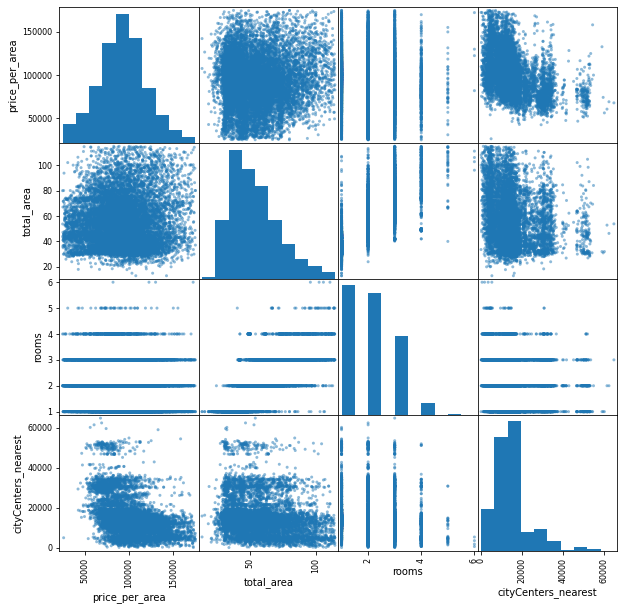

In [48]:
#корреляция значений 
good_data_stat = good_data[['price_per_area','total_area','rooms','cityCenters_nearest']]
pd.plotting.scatter_matrix(good_data_stat, figsize=(10, 10)) 
good_data_stat.corr()

**В результате анализа матрицы корреляций, были получены следущие выводы:**
- чем больше комнат, тем больше площадь квартиры
- незначительно коррелирует площадь и стоимость кв м., зависимость положительная. Значения сводных таблиц свидетельствавали об отрицательной корреляция: чем меньше общая площадь, тем выше стоимость кв м. 
- отмечена корреляция в части уменьшения кол-ва комнат и высотности помещения по мере удаления от центра.
- имеетеся положительная корреляция между увеличением площади помещения и высотности помещения. 

In [49]:
#изучим зависимость стоимость кв метра от этажа 
good_data.pivot_table(index='floor_category', values='price_per_area')

,price_per_area
floor_category,
другой,95886.935959
первый,79852.584044
последний,85144.998328


**Стоимость квадратного метра отличается в зависимости от этажа: стоимость квартиры  на первом этаже будет самая низкая.** 

### Главные факторы, вляющие на стоимость 1 кв.м недвижимости:
 
- удаленность от центра;
- количество комнат;
- этажность.

### Динамика стоимости 1 кв. м. 2015-2019 гг

,price_per_area
first_exposition_year,
2015,88775.063826
2016,91073.145093
2017,90931.244925
2018,93665.443403
2019,102612.823362


<AxesSubplot:xlabel='first_exposition_year'>

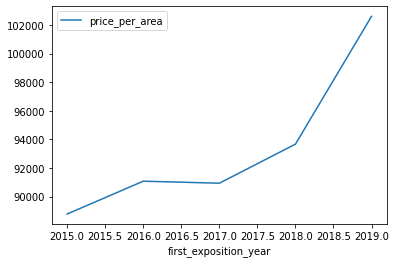

In [50]:
#изучим зависимость стоимость кв метра от даты размещения объявления
display(good_data.pivot_table(index='first_exposition_year', values='price_per_area'))
(
    good_data
    .pivot_table(index='first_exposition_year', values='price_per_area')
    .plot()
)

**Вывод:**
- с 2017 по 2019 год наблюдался постоянный рост стоимости кв м
- с 2015 года стомость кв м выросла на 7,5%

### Помесячная динамика стоимости 1 кв. м. в 2018 году

In [51]:
#изучим как изменялась стоимость кв м по месяцам в 2018 году
good_data_2018 = data.loc[data['first_exposition_year']==2018]
month = data[['first_exposition_month_index','first_exposition_month']].drop_duplicates().sort_values(by='first_exposition_month_index')
good_data_18 = good_data_2018.pivot_table(index='first_exposition_month_index', values='price_per_area')
stat_18 = month.merge(good_data_18, on='first_exposition_month_index')
stat_18

,first_exposition_month_index,first_exposition_month,price_per_area
0,1,January,94916.532596
1,2,February,93745.346877
2,3,March,93874.728307
3,4,April,104066.466329
4,5,May,105293.386354
5,6,June,97329.066464
6,7,July,96919.160713
7,8,August,100834.109710
8,9,September,99669.830813
9,10,October,98290.781996


<AxesSubplot:xlabel='first_exposition_month'>

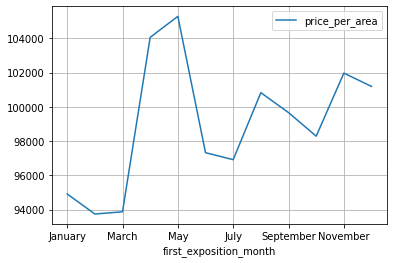

In [52]:
stat_18.plot(x='first_exposition_month', y='price_per_area', grid=True)

**Вывод:**
- стоимость недвижимости менялась в течение года волнообразно. Наименьшая стоимость кв.м. была зафиксирована в феврале, наибольшая - мае. За этот период кв м подоражал на 10% 
- дополнительный фактор, вляющий на стоимость недвижимости - сезонность. Есть периоды с высокой по отношению к другим периодам этого же года стоимостью. Скорее всего, обусловленно спросом на недвижимостью. Так начало года не самое лучшее время для продажи.

### Динамика стоимости 1 кв. м. в течение недели 

,price_per_area
first_exposition_day_of_week,
Friday,99227.914200
Monday,107935.350623
Saturday,118687.642154
Sunday,85464.722050
Thursday,99137.084172
Tuesday,111782.977503
Wednesday,108396.331207


<AxesSubplot:xlabel='first_exposition_day_of_week'>

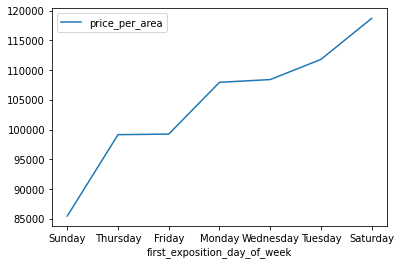

In [53]:
#изучим как изменялась стоимость кв м по дням недели в течение мая в 2018 году
good_data_2018_may = data.loc[(data['first_exposition_year']==2018)&(data['first_exposition_month']=='May')]
display(good_data_2018_may.pivot_table(index='first_exposition_day_of_week', values='price_per_area'))
(
    good_data_2018_may
    .pivot_table(index='first_exposition_day_of_week', values='price_per_area')
    .sort_values('price_per_area')
    .plot()
)

**Вывод:**
- В субботу публиковались предложения квартир с наибольшей стоимостью за 1 кв м


### Стоимость 1 кв. м. в населенных пунктах с наибольшим количеством предложений

In [54]:
#10 населенных пунктов с наибольшим количеством объявлений
top = good_data.groupby('locality_name').agg({'price_per_area':['count','mean']})
top.columns = ['кол-во','кв м']
top.sort_values(by='кол-во', ascending=False).head(10) 

,кол-во,кв м
locality_name,,
Санкт-Петербург,9392,104726.311461
посёлок Мурино,382,85510.212062
посёлок Шушары,326,77691.638378
Всеволожск,273,66926.543943
посёлок Парголово,240,89245.543724
Колпино,236,73980.537568
Пушкин,228,100244.814966
деревня Кудрово,215,92946.319576
Гатчина,207,68311.907938


**Вывод:**
- самая высокая стоимость 1 кв.м. в Санкт-Петербурге 
- самая низкая стоимость 1 кв.м. в Выборге

### Границы самой дорогой недвижимости в Санк-Петербурге (удаленнность от центра)

<AxesSubplot:xlabel='dis_to_centre'>

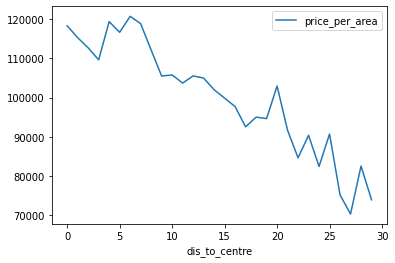

In [55]:
spb_realty = good_data.copy()
spb_realty = spb_realty.loc[spb_realty['locality_name']=='Санкт-Петербург']
spb_realty['cityCenters_nearest'] = spb_realty['cityCenters_nearest'].fillna(spb_realty['cityCenters_nearest'].median()) 
spb_realty['dis_to_centre'] = spb_realty['cityCenters_nearest']/1000  
spb_realty['dis_to_centre'] = spb_realty['dis_to_centre'].astype(int)
segment_centre = spb_realty.pivot_table(index='dis_to_centre', values='price_per_area')
segment_centre.plot()

**Вывод:**
- судя по графику стоимость резко начинает снижаться в районе 7 км от центра города

Таким образом, можно выделить среди представленной недвижимости на рынке Санк-Петербурга сегмент квартир удаленностью не более 7 км от центра.  

In [56]:
# выделим сегмент самой дорогой недвижимости в Санкт-Петербурге
top_segment = spb_realty.query('dis_to_centre<=7')
top_segment.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_area,first_exposition_day_of_week,first_exposition_month,first_exposition_month_index,first_exposition_year,floor_category,living_area_ratio,kitchen_area_ratio,dis_to_centre
24,8,6500000.0,97.2,2015-10-31,2,2.70,3,46.50,1,False,...,265.0,66872.427984,Saturday,October,10,2015,первый,0.478395,0.201646,2
99,32,9600000.0,90.0,2017-09-26,4,2.70,5,67.00,2,False,...,104.0,106666.666667,Tuesday,September,9,2017,другой,0.744444,0.088889,2
111,4,4590000.0,40.0,2017-05-29,1,2.70,6,18.00,1,False,...,31.0,114750.000000,Monday,May,5,2017,первый,0.450000,0.250000,6
136,16,6500000.0,51.8,2018-08-01,2,3.45,6,25.60,2,False,...,163.0,125482.625483,Wednesday,August,8,2018,другой,0.494208,0.140927,3
137,11,13310800.0,85.1,2018-01-01,2,2.70,10,31.52,5,False,...,340.0,156413.631022,Monday,January,1,2018,другой,0.370388,0.315511,4


#### Медианная  стоимость 1 кв.м в квартирах с разным количеством комнат

In [57]:
(
    top_segment
    .query('total_area<115 and 1<=rooms<=6 and 25000<price_per_area<175000')
    .pivot_table(index='rooms', values='price_per_area', aggfunc=['median', 'count'])
)

,median,count
,price_per_area,price_per_area
rooms,,
1,135306.038048,300
2,117142.857143,617
3,105796.640141,516
4,100401.606426,171
5,96045.414630,20
6,126273.584906,4


**Вывод:**
- по количеству квартир в сегменте дорогой недвижимости превалируют 2к и 3 к, меньше всего квартир от 4к и больше
- медианная стоимость 1 кв.м в 1к квартире превышает стоимость кв.м в остальных квартирах. Самый дешевый кв. м. в 5к квартире (см. распределение значений на графике ниже)

<AxesSubplot:xlabel='rooms'>

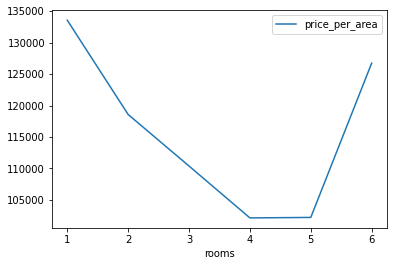

In [58]:
(
    top_segment
    .query('total_area<115 and 1<=rooms<=6 and 25000<price_per_area<175000')
    .pivot_table(index='rooms', values='price_per_area')
    .plot()
)


#### Влияние фактора удаленности от центра на стоимость 1 кв.м в сегменте дорогой недвижимости 

In [59]:
(
    top_segment
    .query('total_area<115 and 1<=rooms<=6 and 25000<price_per_area<175000')
    .pivot_table(index='dis_to_centre', values=['total_area', 'price_per_area', 'rooms', 'ceiling_height'], aggfunc='median')
)

,ceiling_height,price_per_area,rooms,total_area
dis_to_centre,,,,
0,3.04,110041.265475,3.0,81.00
1,2.82,113247.863248,3.0,81.50
2,3.00,110289.909170,2.0,69.35
3,2.85,104389.412998,2.5,69.65
4,2.72,119420.903955,2.0,69.60
5,2.70,114752.000263,2.0,68.00
6,2.70,115666.266507,2.0,56.30
7,2.70,119047.619048,2.0,57.50


**Вывод:**
- прямого влияния фактора отдаленности на стоимость кв м не отмечено, однако в выборку попали квартиры с разным количеством комнат. Было отмечено, что стоимость кв м в 2 к выше, чем стоимость кв м в 3к квартире, ввиду этого имеет смысл изучить влиянияе разных факторов на квартиры с одинаковым количеством комнат.
- также было отмечено, что квартиры большей площадью и соответственно с большим кол-вом комнат тяготеют к центру
- высота помещений в центральном сегменте также выше

*Оценим влияние фактора удаленности от центра на стоимость квадратного метра 2к квартиры (тк их больше всего в выборке)*

In [60]:
(
    top_segment
    .query('total_area<115 and rooms==2 and 25000<price_per_area<175000')
    .pivot_table(index='dis_to_centre', values=['total_area', 'price_per_area', 'rooms', 'ceiling_height'], aggfunc='median')
)


,ceiling_height,price_per_area,rooms,total_area
dis_to_centre,,,,
0,2.70,116263.565891,2,64.5
1,2.70,114000.000000,2,63.3
2,2.95,114213.547646,2,64.0
3,2.70,112051.391255,2,58.7
4,2.75,122876.712329,2,62.5
5,2.70,120222.222222,2,60.0
6,2.70,115000.000000,2,53.0
7,2.70,116407.982262,2,55.0


**Вывод:**
- в целом прослеживается назначительное влияние стоимости кв м от фактора удаленности от центра. Но поскольку выделен более менее однородный сегмент, не стоит ожидать в нем болшого разрброса значений  (см. ниже график)

<AxesSubplot:xlabel='dis_to_centre'>

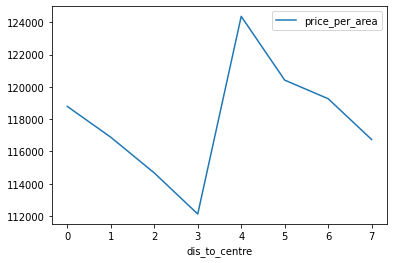

In [61]:
(
    top_segment
    .query('total_area<115 and rooms==2 and 25000<price_per_area<175000')
    .pivot_table(index='dis_to_centre', values='price_per_area')
    .plot()
)

#### Влияние фактора этажности на стоимость 1 кв.м в сегменте дорогой недвижимости


<AxesSubplot:xlabel='floor_category'>

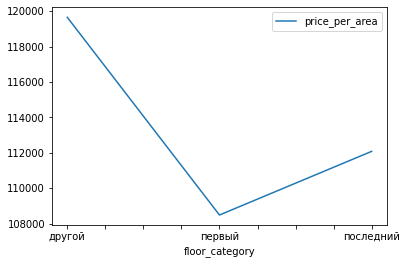

In [62]:
(
    top_segment
    .query('total_area<115 and 1<=rooms<=6 and 25000<price_per_area<175000')
    .pivot_table(index='floor_category', values='price_per_area')
    .plot()
)

**Вывод:**
- зависимость фактора этажности прослеживается. кв м вне зависимоти от кол-ва комнат на первом этаже стоит дешевле. 

## Общий вывод

В результате анализа рынка недвижимости Санкт-Петребурга и его окрестностей можно выделить общие тенденции, по которым существет рынок недвижимости в целом.
- Значительнее всего на стоимость жилья влияет удаленность объекта от центра города.  
- Стоимость 1 кв. метра в 1к квартире выше, чем в квартирах 2к, 3к, 4к.  
- Этажность. Первый и последний существенно ниже остальных.
- Сделки на рынке недвижимости носят сезонный характер. Начало года, период летних отпусков - низкий спрос==более низкая стоимость. 

Отличительные черты рынка недвижимости в Санкт-Петербурге:
- В центральной части города преобладают квартиры с большей площадью. 
- Отмечено, что высотность потолков превышает среднее значение по выборке. 
- Доля 2к и 3к квартир  в центре города на рынке выше, чем по всей территории, где в выборке преобладают 1к.  